# <font color = 'orange'> Simple Linear Regression

---

### <font color = 'Blue'> Import library and load dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height-weight.csv')

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.shape

(23, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


---

### <font color = 'Blue'> Visual represetation of data

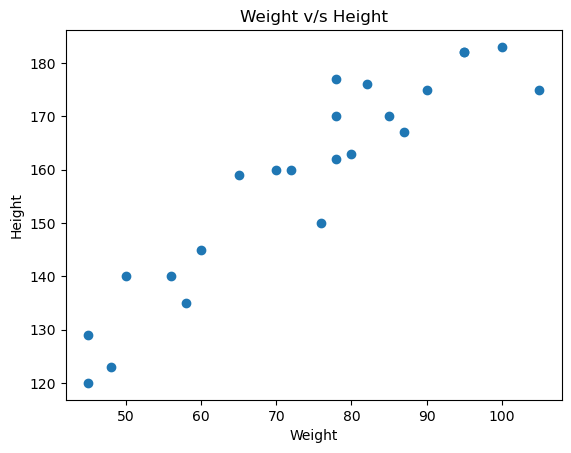

In [5]:
plt.scatter(x = df['Weight'],y = df['Height'])
plt.title('Weight v/s Height')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.show()

### <font color = '#AA00FF'> Aim :
* To Create a best fit line which has least error.

---

#### In machine learning before training model we need to perform some steps :
1. Divide the features based on independent and dependent features.
2. Train, Test split of dataset.
3. Standardize the data.
4. Train the model using LinearRegression
5. Test model.
6. Performance metrics.
7. Assumptions.

---

### <font color = 'Blue'> 1. Divide the features based on independent and dependent features.

In [6]:
# x is independent feature
x = df[['Weight']]

# y is dependent feature
y = df['Height']

In [7]:
print(x)
print()
print(y)

    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64


---

### <font color = 'Blue'> 2. Train Test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
print('Length of Dataset :',len(df['Weight']))

print('Length of train data :',len(x_train))
# test data size is 20% of actual data size.
print('Length of test data :',len(x_test))

Length of Dataset : 23
Length of train data : 18
Length of test data : 5


---

### <font color = 'Blue'> 3. Standardize the train independent data.

#### Because weight vary in different scale i.e 50-100. Therefore, we need to scale down the data so that our gradient descent optimization will happen quickly.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

#### We need to optimize our training data also based on the observation got in the test data.

In [13]:
# it will apply the z-score for every point in the dataset
# we need mean and std to apply z-score that will be calculated by fit 
# transform applies the z-score

x_train = scaler.fit_transform(x_train)

# no need to calculate the mean and std as it is already calculated above so fit is not required 
# here, in x_test it will take the mean and std of train dataset and apply the z-score for test data
x_test = scaler.transform(x_test)

#### We do only transform on test dataset because of data leakage
#### We do this because our model should not know anything about our test data but it should have only information about the train data such as mean and std

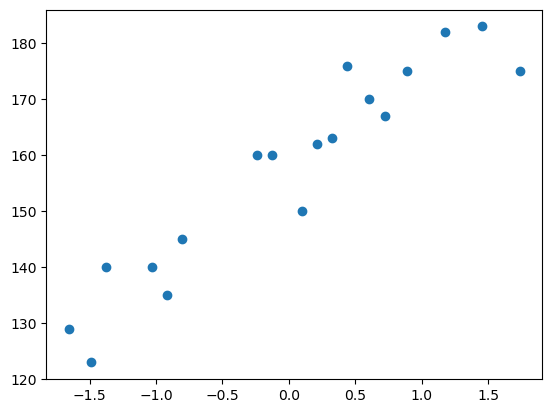

In [14]:
plt.scatter(x_train,y_train)

### <font color = '#AA00FF'> Observation :
* Here, our weight feature is scale down between -1.5 to +1.5

---

### <font color = 'Blue'> 4. Train the simple linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

#### fit will find intercept and slope value

In [17]:
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
print('The slope or coefficient of weight is',regressor.coef_)
# it will give the slope of the features
# Here, we have one feature so only 1 slope 

The slope or coefficient of weight is [17.03440872]


In [19]:
print('The intercept of weight is',regressor.intercept_)

The intercept of weight is 157.5


### <font color = '#AA00FF'> Observation :
* $\theta_{0}$ = 157.5 (Intercept)
* $\theta_{1}$ = 17.03440872 (Coefficient or slope)

#### Line equation : $ h_{\theta}(x) = \theta_{0} + \theta_{1}x$

#### Now, we will create the best fit line

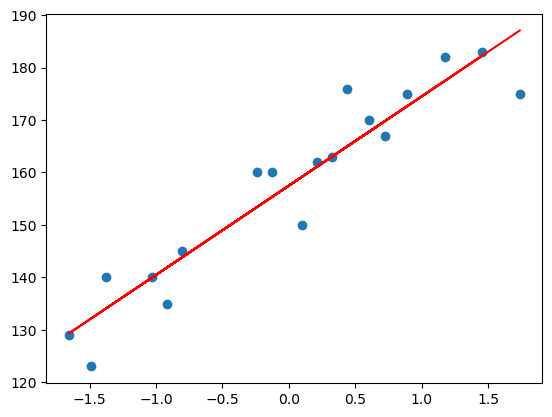

In [20]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

---

### prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

---

### <font color = 'Blue'> 5. Test model with test data.

In [21]:
y_pred = regressor.predict(x_test)

In [22]:
y_pred , y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

#### We can compare and calculate the accuracy

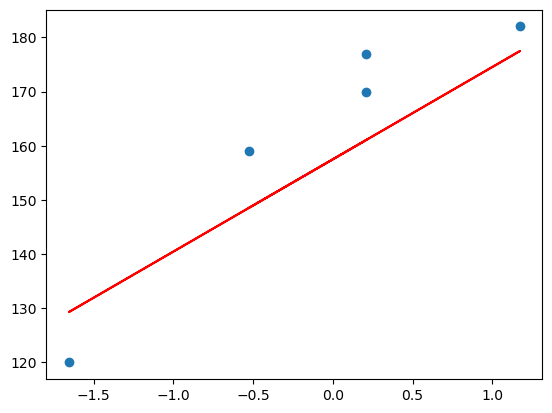

In [23]:
# for actual point
plt.scatter(x_test,y_test)

# best fit line is calculated
plt.plot(x_test,regressor.predict(x_test),'r')

---

### <font color = 'Blue'> 6. Performance metrics.
* MSE, MAE and RMSE.
* R$^2$ and Adjusted R$^2$

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

#### Less the error then better the will be model.

In [26]:
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


#### How good our model is ?..
$$ R_{squared} = 1 - \frac{{\sum{ (y_{i} - \hat{y_{i}})^2}}}{{\sum{ (y_{i} - \bar{y_{i}})^2}}}$$  

$$ Adjusted_{R_{squared}} = 1 - \frac{(1-R^2)\times(N-1)}{N-p-1}$$

In [27]:
from sklearn.metrics import r2_score

In [28]:
r_square = r2_score(y_test,y_pred)

In [29]:
print('Our model is',round((r_square*100),2),'% accurate calculated using r square.')

Our model is 77.7 % accurate calculated using r square.


In [30]:
n = len(y_test)
p = x_test.shape[1]

adjusted_r_square = 1 - ((1-r_square)*(n-1)/(n-p-1))

In [31]:
print('Our model is',round((adjusted_r_square*100),2),'% accurate calculated using adjusted r square.')

Our model is 70.26 % accurate calculated using adjusted r square.


#### Always : $ R_{squared} > Adjusted_{R_{squared}} $

---

### <font color = 'Blue'> For any new weight
1. Scale the weight.
2. predict the height.
3. Render the resuls.

In [32]:
weight = 80
scaled_weight = scaler.transform([[weight]])
scaled_weight

D:\Anconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [33]:
height_pred = regressor.predict(scaled_weight)
height_pred

array([163.01076266])

In [34]:
print(f'Height predicted for weight {weight} kg is {round(height_pred[0],2)} cm')

Height predicted for weight 80 kg is 163.01 cm


---

### <font color = 'Blue'> Assumptions

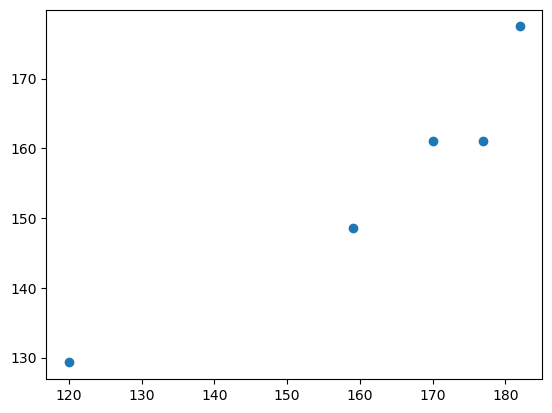

In [35]:
# Assumption 1
# plot scatter plot for the actual value and predicted value
plt.scatter(y_test,y_pred)

### <font color = '#AA00FF'> Conclusion :
* If plot looks linear then our prediction is done well.

In [36]:
# Assumption 2
# Residuals 

residuals = y_test - y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

D:\Anconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

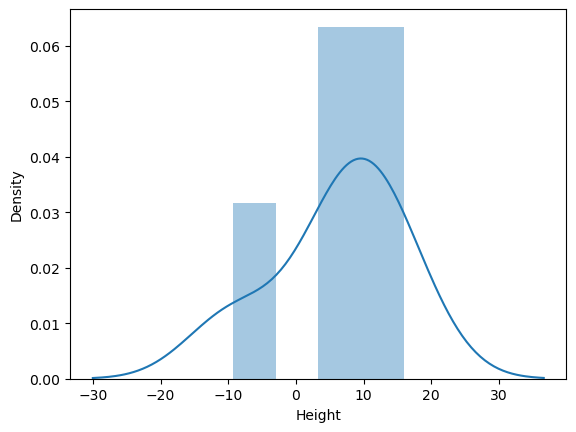

In [37]:
# plot the residuals 

import seaborn as sns
sns.distplot(residuals , kde = True)

### <font color = '#AA00FF'> Conclusion :
* If normal distribution then better model is created.

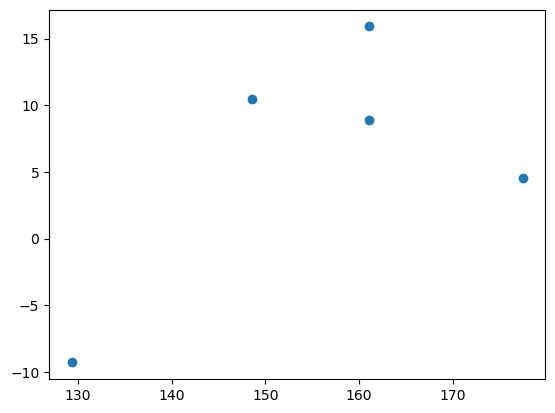

In [38]:
# scatter plot with respect to prediction and residuals

plt.scatter(y_pred,residuals)

### <font color = '#AA00FF'> Conclusion :
* If uniform distribution then better model is created.

### <font color = 'Blue'> Pickling the model - model is converted into file and used to predict output for any new data.

---